<h1>Menggunakan Dataset dari tf.data.datasets

In [1]:
import tensorflow as tf

#menampilkan versi tensorflow
print(tf.__version__)

2.9.2


Kemudian kita buat objek untuk menampung dataset kita dan masukkan fungsi tf.keras.datasets.<nama_dataset> pada objek tersebut


In [2]:
mnist = tf.keras.datasets.mnist

Fungsi load_data() dari objek dataset mengembalikan dataset yang telah dibagi menjadi atribut latih, label latih, atribut uji, dan label uji. 

In [7]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

Kita bisa menampilkan label dan salah satu gambar dari data latih menggunakan library matplotlib.

5


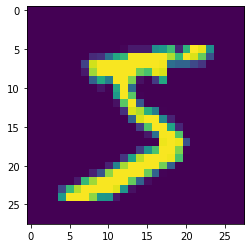

In [8]:
import numpy as np
np.set_printoptions(linewidth = 200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

Namun, dataset yang kita miliki, masih belum di normalisasi, sehingga kita harus melakukan secara manual. Kode di bawah berfungsi untuk membagi setiap piksel pada gambar sebesar 255 karena nilai sebuah piksel berkisar dari 0 sampai 255

In [9]:
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

Kita gunakan 3 layer sebagai arsitektur model kita. untuk layer pertama kita menggunakan layer khusus yaitu Flatten yang berfungsi untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

Terakhir kita tentukan optimizer dan loss untuk model kita dan mulai pelatihan model kita

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train
model.fit(gambar_latih, label_latih, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2559 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0789 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0601 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0470 - accuracy: 0.9849
